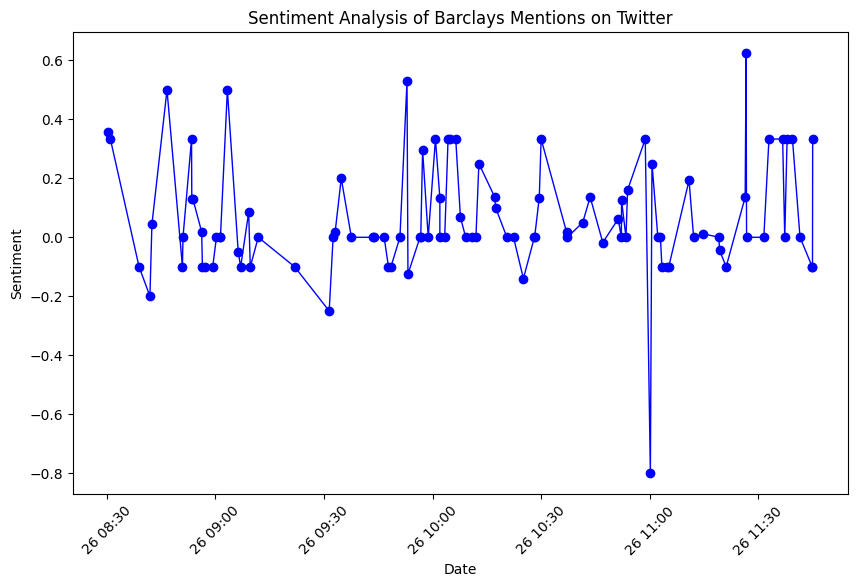

In [3]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob  # For sentiment analysis

# Set up your Twitter API v2 credentials
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAHHuyQEAAAAApAT%2Bpdoxk6tSUOPMsbAUxo%2F4Q5M%3DtIPJl0IhIMkOJUD1cXnTz0J0GjOmoNIrJEgFOPPluuH0KkpyZw'


# Authenticate with Twitter API v2
client = tweepy.Client(bearer_token)

# Search for tweets related to Barclays using API v2
tweets = client.search_recent_tweets('Barclays', tweet_fields=['created_at'], max_results=100)

# Collect tweet text and timestamp
tweet_data = []
for tweet in tweets.data:
    tweet_data.append({'text': tweet.text, 'created_at': tweet.created_at})

# Convert to DataFrame
df = pd.DataFrame(tweet_data)

# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

# Apply sentiment analysis
df['sentiment'] = df['text'].apply(get_sentiment)

# Plot sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(df['created_at'], df['sentiment'], marker='o', color='blue', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Barclays Mentions on Twitter')
plt.xticks(rotation=45)
plt.show()
